# EMPIRICAL MACROECONOMICS

Francesco Franco , Nova SBE

## Non recoverable shocks: replication of Blanchard, Olivier J., Jean-Paul L'Huillier, and Guido Lorenzoni AER 2013
**News, Noise, and Fluctuations: An Empirical Exploration." American Economic Review, 103 (7): 3045-70.**

# PART I The Economic Model

### A) The optimal consumption decision of the consumer requires to solve a filtering problem: 
$$S_{t}=\left[\begin{array}{c}
x_{t}\\
x_{t-1}\\
z_{t}
\end{array}\right]=\begin{bmatrix}1+\rho & -\rho & 0\\
1 & 0 & 0\\
0 & 0 & \rho
\end{bmatrix}S_{t-1}+\begin{bmatrix}1 & 0\\
0 & 0\\
0 & 1
\end{bmatrix}\left[\begin{array}{c}
\epsilon_{t}\\
\eta_{t}
\end{array}\right]$$
$$X_{t}=\begin{bmatrix}a_{t}\\
s_{t}
\end{bmatrix}=\begin{bmatrix}1 & 0 & 1\\
1 & 0 & 0
\end{bmatrix}S_{t}+\begin{bmatrix}0\\
1
\end{bmatrix}v_{t}$$

In [1]:
'''Importing packages and functions''' 

import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import time
import pandas as pd
from scipy.optimize import root

In [2]:
'''Build the Matrices of the SSM'''

rho      = 0.891
sig2_a   = 0.67**2
sig2_nu  = 0.89**2
sig2_eps = (1-rho)**2*sig2_a
sig2_eta = sig2_a*rho

Q = np.array([[sig2_eps,0,0],
              [0,0,0],
              [0,0,sig2_eta]])

A = np.array([[1+rho,-rho,0],
              [1,0,0],
              [0,0,rho]])

B =np.array([[1,0],
             [0,0],
             [0,1]])

C = np.array([[1,0,1],
              [1,0,0]])

D = np.array([[0],
              [1]])

R = np.array([[0,0],
              [0,sig2_nu]])
#Alternative initializaton
Σ_t_t1 = np.array([[99999,0,0],
                   [0,99999,0],
                   [0,0,sig2_eta/(1-rho)]])

Σ_t_t1 = np.array([[1,0,0],
                   [0,1,0],
                   [0,0,1]])

The consumer forms expectations on the productivity process
$$\hat{S}_{t|t}=\hat{S}_{t|t-1}+\Sigma_{t,t-1}C'\left[C\Sigma_{t,t-1}C'+R\right]^{-1}\left(X_{t}-C\hat{S}_{t|t-1}\right)$$
Define $$K_t =\Sigma_{t,t-1}C'\left[C\Sigma_{t,t-1}C'+R\right]^{-1}$$ and $$\Sigma_{t|t}=\Sigma_{t|t-1}-K_t C\Sigma_{t|t-1}$$

Notice here the $K_t$ is not the Kalman gain defined in the notes (which is the usual Kalman Gain). To understand the difference remember here we are interested in $\hat{S}_{t|t}$ not in $\hat{S}_{t+1|t}$. Therefore we have the gain to forecast:

$$\hat{S}_{t|t}=\hat{S}_{t|t-1}+K_t\left(X_{t}-C\hat{S}_{t|t-1}\right)$$

while in the standard textbook kalman filter (e.s. Hamilton) you have

$$\hat{S}_{t+1|t}=A\hat{S}_{t|t-1}+A\Sigma_{t,t-1}C'\left[C\Sigma_{t,t-1}C'\right]^{-1}\left(X_{t}-C\hat{S}_{t|t-1}\right)$$

$$\hat{S}_{t+1|t}=A\hat{S}_{t|t-1}+K_{t}\left(X_{t}-C\hat{S}_{t|t-1}\right)$$

so the standard text book Kalman gain is $A$ times the present Kalman gain.

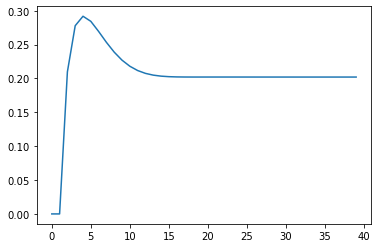

In [3]:
'''
compute the Kalman gain, stationary assuming many periods have passed
'''
iter = 40

conv = np.zeros(iter) 
for i in range(1,iter):
    
    K      = Σ_t_t1@C.T@LA.inv(C@(Σ_t_t1@C.T)+R)
    Σ_t_t  = Σ_t_t1 - K@C@Σ_t_t1
    Σ_t_t1 = A@Σ_t_t@A.T + Q
    conv[i] = K[1,1]
plt.plot([i for i in range(iter)],conv)    

    

### B) with expectations formed the consumer uses the expectations to compute his consumption decision
we just obtained the law of motion of the expectations:
$$\hat{S}_{t|t}=\hat{S}_{t|t-1}+K\left(X_{t}-C\hat{S}_{t|t-1}\right)$$

$$\hat{S}_{t|t}=A\hat{S}_{t-1|t-1}+K\left(X_{t}-CA\hat{S}_{t-1|t-1}\right)$$

$$\hat{S}_{t|t}=(I-KC)A\hat{S}_{t-1|t-1}+KX_{t}$$

Write the economic model after having found $K$ (the model is in state space form)

$$X_{t}=CS_{t}+Dv_{t}$$ and $$S_{t}=AS_{t-1}+B\eta_{t}$$

you obtain the complete solution for the consumer:

$$S_{t}^{e}=\left[\begin{array}{c}
x_{t}\\
x_{t-1}\\
z_{t}\\
\hat{x}_{t|t}\\
\hat{x}_{t-1|t}\\
\hat{z}_{t|t}
\end{array}\right]=\begin{bmatrix}A & 0\\
KCA & \left(I-KC\right)A
\end{bmatrix}S_{t-1}^{e}+\begin{bmatrix}B & 0\\
KCB & KD
\end{bmatrix}\left[\begin{array}{c}
\epsilon_{t}\\
\eta_{t}\\
v_{t}
\end{array}\right]$$
$$X_{t}^{e}=\begin{bmatrix}a_{t}\\
c_{t}
\end{bmatrix}=\begin{bmatrix}1 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & \frac{1}{1-\rho} & -\frac{\rho}{1-\rho} & 0
\end{bmatrix}S_{t}^{e}$$

In [4]:
'''
Build the matrices of the consumer model
'''
IKCA  = (np.identity(3)-K@C)@A
BIG_A = np.vstack([np.hstack([A,np.zeros([3,3])]),
                   np.hstack([K@C@A,IKCA])])     
BIG_B = np.vstack([np.hstack([B,np.zeros([3,1])]),
                   np.hstack([K@C@B,K@D])])
BIG_C = np.vstack([[1,0,1,0,0,0],
                  [0,0,0,1/(1-rho),-rho/(1-rho),0]])
 

In [5]:
shocks=np.array([sig2_eps**0.5, 0, 0])

In [6]:
#Alternatives to expand dimension of array

In [7]:
shocks.shape

(3,)

In [8]:
np.expand_dims(shocks,axis=0)


array([[0.07303, 0.     , 0.     ]])

In [9]:
shocks[np.newaxis,:]

array([[0.07303, 0.     , 0.     ]])

In [10]:
np.atleast_2d(np.array([0, sig2_eta**0.5, 0]))

array([[0.        , 0.63243174, 0.        ]])

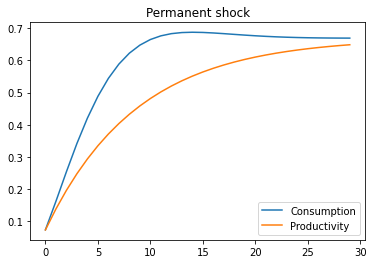

In [11]:
'''
SIMULATE a PERMANENT SHOCK
'''
T=30
shocks = np.array([sig2_eps**0.5, 0, 0])
shocks = shocks[np.newaxis,:]
S = BIG_B@shocks.T
c_eps = np.zeros([T,1])
a_eps = np.zeros([T,1])
for t in range(0,T):
    c_eps[t]=[0,0,0,1/(1-rho),-rho/(1-rho),0]@S
    a_eps[t]=[1,0,1,0,0,0]@S
    S=BIG_A@S
plt.title('Permanent shock')

plt.plot(c_eps)
plt.plot(a_eps)
plt.legend(('Consumption', 'Productivity'),loc='lower right')

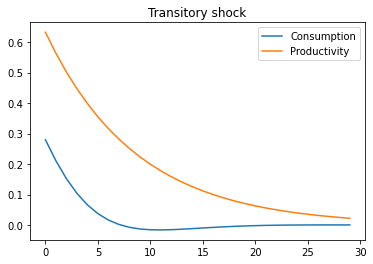

In [12]:
'''
SIMULATE A TRANSITORY SHOCK
'''
T=30
shocks = np.atleast_2d(np.array([0, sig2_eta**0.5, 0]))
S = BIG_B@shocks.T
c_eta = np.zeros([T,1])
a_eta = np.zeros([T,1])
for t in range(0,T):
    c_eta[t]=[0,0,0,1/(1-rho),-rho/(1-rho),0]@S
    a_eta[t]=[1,0,1,0,0,0]@S
    S=BIG_A@S
plt.title('Transitory shock')

plt.plot(c_eta)
plt.plot(a_eta)    
plt.legend(('Consumption', 'Productivity'),loc='upper right')

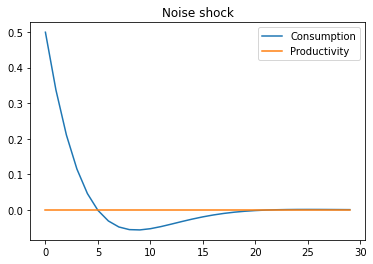

In [13]:
'''
SIMULATE A Noise SHOCK
'''
T=30
shocks = np.atleast_2d(np.array([0, 0, sig2_nu**0.5]))
S = BIG_B@shocks.T
c_nu = np.zeros([T,1])
a_nu = np.zeros([T,1])
for t in range(0,T):
    c_nu[t]=[0,0,0,1/(1-rho),-rho/(1-rho),0]@S
    a_nu[t]=[1,0,1,0,0,0]@S
    S=BIG_A@S
plt.title('Noise shock')

plt.plot(c_nu)
plt.plot(a_nu)    
plt.legend(('Consumption', 'Productivity'),loc='upper right')

In [14]:
'''
# Graph 1
plt.style.use('dark_background')
fig = plt.figure(figsize=(40,12))
plt.subplot(131)
plt.title('Permanent shock', fontsize=32)
plt.plot(c_eps,linewidth=6)
plt.plot(a_eps,linewidth=6)
plt.grid()
plt.legend(('Consumption', 'Productivity'),loc='lower right', fontsize=32)
plt.subplot(132)
plt.title('Transitory shock', fontsize=32)
plt.plot(c_eta,linewidth=6)
plt.plot(a_eta,linewidth=6) 
plt.grid()
plt.legend(('Consumption', 'Productivity'),loc='upper right', fontsize=32)
plt.subplot(133)
plt.title('Noise shock', fontsize=32)
plt.plot(c_nu,linewidth=6)
plt.plot(a_nu,linewidth=6) 
plt.grid()
plt.legend(('Consumption', 'Productivity'),loc='upper right', fontsize=32)

plt.suptitle('Impulse Response Functions', fontsize=32)

fig.patch.set_facecolor('#191919')
plt.savefig('C:\\Users\\ffranco\\Dropbox\\Github\\Prova\\assetsEM\\pasted1.png', facecolor=fig.get_facecolor())
#plt.savefig("/Users/francescofranco/Dropbox/Github/Prova/assetsEM/Pasted1.png", facecolor=fig.get_facecolor())
plt.show()
'''

'\n# Graph 1\nplt.style.use(\'dark_background\')\nfig = plt.figure(figsize=(40,12))\nplt.subplot(131)\nplt.title(\'Permanent shock\', fontsize=32)\nplt.plot(c_eps,linewidth=6)\nplt.plot(a_eps,linewidth=6)\nplt.grid()\nplt.legend((\'Consumption\', \'Productivity\'),loc=\'lower right\', fontsize=32)\nplt.subplot(132)\nplt.title(\'Transitory shock\', fontsize=32)\nplt.plot(c_eta,linewidth=6)\nplt.plot(a_eta,linewidth=6) \nplt.grid()\nplt.legend((\'Consumption\', \'Productivity\'),loc=\'upper right\', fontsize=32)\nplt.subplot(133)\nplt.title(\'Noise shock\', fontsize=32)\nplt.plot(c_nu,linewidth=6)\nplt.plot(a_nu,linewidth=6) \nplt.grid()\nplt.legend((\'Consumption\', \'Productivity\'),loc=\'upper right\', fontsize=32)\n\nplt.suptitle(\'Impulse Response Functions\', fontsize=32)\n\nfig.patch.set_facecolor(\'#191919\')\nplt.savefig(\'C:\\Users\\ffranco\\Dropbox\\Github\\Prova\\assetsEM\\pasted1.png\', facecolor=fig.get_facecolor())\n#plt.savefig("/Users/francescofranco/Dropbox/Github/Prova

# PART II The SVAR
The econometrician will not be able to recover the shocks without estimating the structural model. To convince ourselves we will proceed with an artificial experiment:
1. Assume the toy-model is the true model and generate an artificial dataset
2. The long-run versus short-run dichotomy suggests we apply the Blanchard and Quah decomposition in a SVAR
3. We can now compare the IRFs from the model (the true IRF) with the IRFs from the SVAR


In [15]:
''' Simulate Artificial data from the model'''
T_obs  = 500
S_sim  = np.zeros([6,1])
c_sim  = np.zeros([T_obs,1])
a_sim  = np.zeros([T_obs,1])
dc_sim = np.zeros([T_obs+1,1])
da_sim = np.zeros([T_obs+1,1])
sig2_nu = 0.89**2
scale  = np.atleast_2d(np.array([sig2_eps**0.5, sig2_eta**0.5, sig2_nu**0.5]))
np.random.seed(1234)
for t in range(1,T_obs):
    
    shocks    = scale.T*np.random.randn(3,1)
    S_sim     = BIG_A@S_sim + BIG_B@shocks
    c_sim[t]  = [0,0,0,1/(1-rho),-rho/(1-rho),0]@S_sim
    a_sim[t]  = [1,0,1,0,0,0]@S_sim
    dc_sim[t] = c_sim[t] - c_sim[t-1]
    da_sim[t] = a_sim[t] - a_sim[t-1]

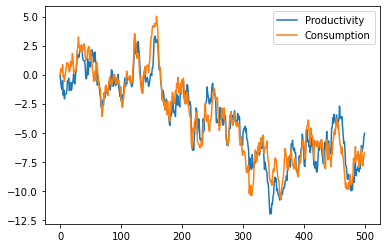

They are clearly co-integrated


In [16]:
''' Let us plot the artificial data'''
plt.plot(a_sim)
plt.plot(c_sim)
plt.legend(('Productivity','Consumption'))
plt.show()
print('They are clearly co-integrated')

In the problem set you have derived the VAR representation of the model:
$$c_{t}	=c_{t-1}+u_{t}^{c}$$
$$a_{t}	=\rho a_{t-1}+(1-\rho)c_{t-1}+u_{t}^{a}$$
Subtract $a_t$ from the second equation and you obtain that $$\Delta a_{t}=\left(1-\rho\right)\left(c_{t-1}-a_{t-1}\right)+u_{t}^{a}$$Given $\Delta a_{t}$ is stationary, this implies that consumption and productivity are cointegrated with a vector $(1,-1)$
### Let us estimate the cointegration relationship
If two time-series are cointegrated the regression: $$a_t = \beta + \beta_cc_t + u_t$$
is legitimate (actually the $\beta_c$ is superconsistent) and the residuals $u_t$ are stationary. 

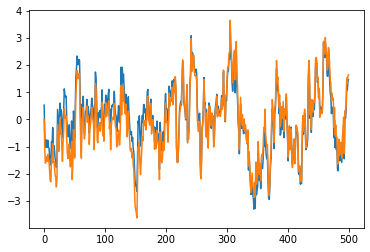

In [17]:
''' Cointegrating vector'''
reg        = np.hstack([np.ones([c_sim.shape[0],c_sim.shape[1]]),c_sim])
bhat_c     = LA.inv(reg.T@reg)@reg.T@a_sim
u_t        = a_sim - reg@bhat_c
da_co      = (a_sim - c_sim)
plt.plot(u_t)
plt.plot(da_co)
plt.show()

### SVAR with LR when there is cointegration (* extra material not for the exam)
There are two cases:
1. If the $I(1)$ variables are not cointegrated or the cointegrating relations are known, then all I(1) variables may be transformed to $I(0)$ variables by expressing them in first differences or as cointegration relations. In that case we just use usual identification scheme.
2. An alternative and more general reduced-form representation of the VAR  that also allows for unknown cointegrating relations is the VECM 

$$\Delta X_{t}=\Pi X_{t-1}+\Gamma_{1}\Delta X_{t-1}+...+\Gamma_{p-1}\Delta X_{t-p+1}+u_{t}$$

where $\Pi=\alpha\beta'$

using the Granger representation: 

$$X_{t} = \Xi\sum_{i=1}^{t}u_{i}+ \Xi^*(L)u_{t} + X_{0}$$

we can show that the long run effect matrix of the reduced form is in this case

$$\Xi=\beta_{\perp}\left[\alpha'_{\perp}\left(I_{2}-\sum_{i=1}^{p-1}\Gamma_{i}\right)\beta_{\perp}\right]^{-1}\alpha'_{\perp}$$
and the structural long run matrix is (using $u_{t}=A_{0}\eta_{t}$) $$LR=\Xi A_{0}$$

that you can use to impose the long run restrition.

You can also use the fact that you can recast the VEC into a VAR in levels and then use the standard IRF formulas. To recast the VEC into a VAR form

$$X_{t}=A_{1}X_{t-1}+...+A_{p}X_{t-p}+u_{t}$$

you can use the following $$A_{1}=\Pi+\Gamma_{1}+I$$ $$A_{i}=\Gamma_{i}-\Gamma_{i-1}\ for\ i=2...p-1$$
$$A_{p}=-\Gamma_{p-1}$$


In [18]:
''' Build the VEC DATA'''

df   = np.hstack([dc_sim,da_sim])
X    = pd.DataFrame(df)
df2  = pd.DataFrame(u_t)
XLAG = pd.DataFrame()

num_lags = 8 

for i in range(1,num_lags+1):
    XLAG = pd.concat([XLAG,X.shift(i).add_suffix("-"+str(i))],axis=1)

#change names to frames that we modify   
XLAG     = pd.concat([df2,XLAG],axis=1)
X2       = X.iloc[num_lags:T_obs-2,:]
XLAG2    = XLAG.iloc[num_lags:T_obs-2,:]
num_vars = X2.shape[1]
num_obs  = XLAG2.shape[0]
#Building arrays for using OLS
X3       = np.array(X2)
XLAG3    = np.array(XLAG2)
#VAR - standard OLS
Ahat     = LA.inv(XLAG3.T@XLAG3)@XLAG3.T@X3

In [19]:
#Estimated errors
EPS  = X3-XLAG3@Ahat
#estimated covariance matrix
Vhat = EPS.T@EPS/(num_obs - num_lags*num_vars)

Build the LR matrix:  $\Xi=\beta_{\perp}\left[\alpha'_{\perp}\left(I_{2}-\sum_{i=1}^{p-1}\Gamma_{i}\right)\beta_{\perp}\right]^{-1}\alpha'_{\perp}$

In [20]:
# Bulding the LR matrix 
Γ        = Ahat[1:,:].T
Γ1       = Γ[:,0:2]
Γ2       = Γ[:,2:4]
Γ3       = Γ[:,4:6]
Γ4       = Γ[:,6:8]
Γ5       = Γ[:,8:10]
Γ6       = Γ[:,10:12]
Γ7       = Γ[:,12:14]
Γ8       = Γ[:,14:16]
a        = np.hstack([Ahat[0,:].reshape(2,1), -Ahat[1,:].reshape(2,1)])
b        = np.array([[1,-1],[-1,1]]) # cointegration relationship could be estimated
u, s, vh = LA.svd(a, full_matrices=True)
a_ht     = u[0:2,1].reshape(2,1)
u, s, vh = LA.svd(b, full_matrices=True)
b_ht     = u[0:2,1].reshape(2,1)
Ξ        = b_ht@LA.inv(a_ht.T@(np.identity(2)- Γ1-Γ2-Γ3-Γ4-Γ5-Γ6-Γ7-Γ8)@b_ht)@a_ht.T

In [21]:
# Long run restrictions
def objective(x0,Ξ,Vhat,num_vars): 
        A0     = np.reshape(x0,[num_vars,num_vars]) 
        LR     = Ξ@A0 
        H      = A0@A0.T - Vhat 
        H[0,1] = LR[0,1] 
        H      = H.flatten()
        return H 

In [22]:
#Find the structural shock accroding to the LR identification

x0  = ((Vhat**2)**.25).flatten() 
sol = root(objective,x0,args=(Ξ,Vhat,num_vars))
A0  = sol.x.reshape([num_vars,num_vars]) 

#the first shock (supply) should have a positive impact on output (only redefines direction, and changes nothing)
if A0[0,0] < 0: A0[:,0] = -A0[:,0]
#the second shock (demand) should have a positive impact on output (only redefines direction, and changes nothing)
if A0[0,1] < 0: A0[:,1] = -A0[:,1]
#Estimating structural shocks, ETA
F   = LA.inv(A0)
ETA = EPS@F.T

In [23]:
# Cast the estimated VAR in levels
A1 = a@b + Γ1 + np.identity(2)
A2 = Γ2-Γ1
A3 = Γ3-Γ2
A4 = Γ4-Γ3
A5 = Γ5-Γ4
A6 = Γ6-Γ5
A7 = Γ7-Γ8
A8 = Γ8-Γ7
A9 = -Γ8

In [24]:
c_Ahat2 = np.vstack((np.hstack([A1,A2,A3,A4,A5,A6,A7,A8,A9]),np.hstack((np.identity((num_lags)*num_vars),np.zeros([(num_lags)*num_vars,num_vars]))))) 

In [25]:
np.hstack([A1,A2,A3,A4,A5,A6,A7,A8]).shape

(2, 16)

In [26]:
np.hstack(((np.identity((num_lags)*num_vars)),np.zeros([(num_lags)*num_vars,num_vars]))).shape

(16, 18)

In [27]:
#IRFs
'''IRFs are stored in a 3-dimensional array. Dimension 1 is time. Dimension
    2 is variable, and 3 is shock. So IRF(:,2,1) gives the impulse response
    of the second variable to the first shock. IRF_sum gives the integrated
    responses (i.e, in levels). IRF_sum(:,1,1) gives the cumulative impulse
    response of variable 1 to shock 1.'''
    
num_impulses = 30
IRF = np.zeros([num_impulses,num_vars,num_vars])
Temp = np.identity(c_Ahat2.shape[0])

psi = []
for t in range(num_impulses):
    psi_t = Temp[:num_vars,:num_vars] 
    IRF[t,:,:] = np.dot(psi_t,A0) # store the IRF
    Temp = np.dot(c_Ahat2,Temp)   # computes the exponent of the matrix
    #psi.append(psi_t)            # stores the matrices Psi (notations as in Hamilton)

irf = pd.DataFrame({i:IRF[i].flatten() for i in range(num_impulses)}).T #save IRFs into dataframe
irf.columns = ["p_c","t_c","p_ac","t_ac"]


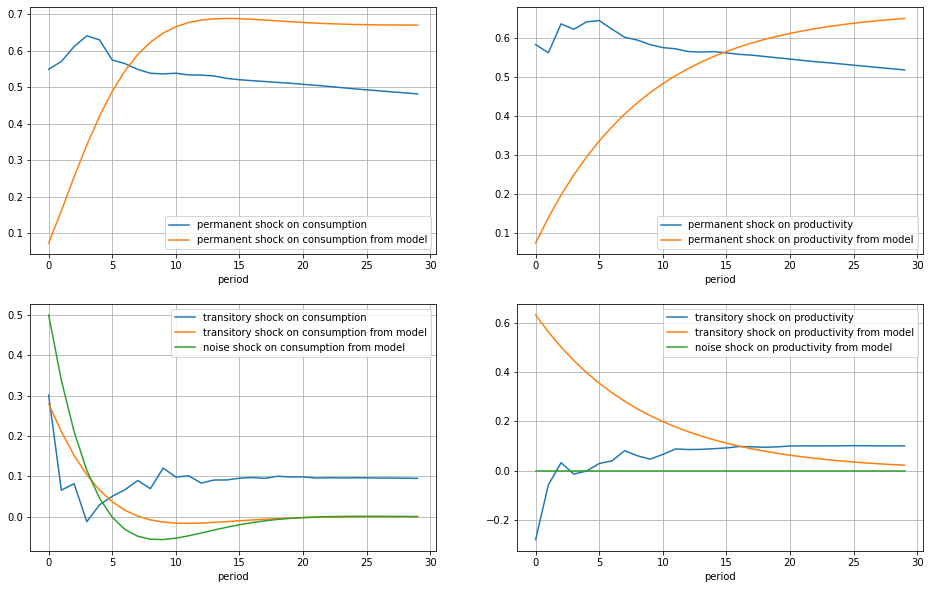

In [28]:
# Plot
plt.figure(figsize=(16,10))
plt.subplot(221)
plt.plot(irf["p_c"],label='permanent shock on consumption')
plt.plot(c_eps,label='permanent shock on consumption from model')
plt.legend()
plt.xlabel('period')
plt.grid()
plt.subplot(222)
plt.plot(irf["p_ac"],label='permanent shock on productivity')
plt.plot(a_eps,label='permanent shock on productivity from model')
plt.legend()
plt.xlabel('period')
plt.grid()
plt.subplot(223)
plt.plot(irf["t_c"],label='transitory shock on consumption')
plt.plot(c_eta,label='transitory shock on consumption from model')
plt.plot(c_nu,label='noise shock on consumption from model')
plt.legend()
plt.xlabel('period')
plt.grid()
plt.subplot(224)
plt.plot(irf["t_ac"],label='transitory shock on productivity')
plt.plot(a_eta,label='transitory shock on productivity from model')
plt.plot(a_nu,label='noise shock on productivity from model')
plt.legend()
plt.xlabel('period')
plt.grid()
plt.show()

In [29]:
# Graph 2
'''
plt.style.use('dark_background')
fig=plt.figure(figsize=(16,10))
plt.subplot(221)
plt.plot(irf["p_c"],label='permanent shock on consumption',linewidth=3)
plt.plot(c_eps,label='permanent shock on consumption from model',linewidth=3)
plt.legend()
plt.xlabel('period')
plt.grid()
plt.subplot(222)
plt.plot(irf["p_ac"],label='permanent shock on productivity',linewidth=3)
plt.plot(a_eps,label='permanent shock on productivity from model',linewidth=3)
plt.legend()
plt.xlabel('period')
plt.grid()
plt.subplot(223)
plt.plot(irf["t_c"],label='transitory shock on consumption',linewidth=3)
plt.plot(c_eta,label='transitory shock on consumption from model',linewidth=3)
plt.plot(c_nu,label='noise shock on consumption from model',linewidth=3)
plt.legend()
plt.xlabel('period')
plt.grid()
plt.subplot(224)
plt.plot(irf["t_ac"],label='transitory shock on productivity',linewidth=3)
plt.plot(a_eta,label='transitory shock on productivity from model',linewidth=3)
plt.plot(a_nu,label='noise shock on productivity from model',linewidth=3)
plt.legend()
plt.xlabel('period')
plt.grid()


plt.suptitle('Impulse Response Functions SVAR')

fig.patch.set_facecolor('#191919')
plt.savefig('C:\\Users\\ffranco\\Dropbox\\Github\\Prova\\assetsEM\\pasted2.png', facecolor=fig.get_facecolor())
#plt.savefig("/Users/francescofranco/Dropbox/Github/Prova/assetsEM/Pasted1.png", facecolor=fig.get_facecolor())
plt.show()
'''

'\nplt.style.use(\'dark_background\')\nfig=plt.figure(figsize=(16,10))\nplt.subplot(221)\nplt.plot(irf["p_c"],label=\'permanent shock on consumption\',linewidth=3)\nplt.plot(c_eps,label=\'permanent shock on consumption from model\',linewidth=3)\nplt.legend()\nplt.xlabel(\'period\')\nplt.grid()\nplt.subplot(222)\nplt.plot(irf["p_ac"],label=\'permanent shock on productivity\',linewidth=3)\nplt.plot(a_eps,label=\'permanent shock on productivity from model\',linewidth=3)\nplt.legend()\nplt.xlabel(\'period\')\nplt.grid()\nplt.subplot(223)\nplt.plot(irf["t_c"],label=\'transitory shock on consumption\',linewidth=3)\nplt.plot(c_eta,label=\'transitory shock on consumption from model\',linewidth=3)\nplt.plot(c_nu,label=\'noise shock on consumption from model\',linewidth=3)\nplt.legend()\nplt.xlabel(\'period\')\nplt.grid()\nplt.subplot(224)\nplt.plot(irf["t_ac"],label=\'transitory shock on productivity\',linewidth=3)\nplt.plot(a_eta,label=\'transitory shock on productivity from model\',linewidth=

# PART III The maximum Likelihood estimation
The econometrician states variables are $S_{t}^{e}=\left(S_{t},\hat{S}_{t|t}\right)'$ and the observalbes $X_{t}^{e}=\left(a_{t},c_{t}\right)$ which deliver the following SSM to be estimated (namely the model economy)
$$S_{t}^{e}=\left[\begin{array}{c}
x_{t}\\
x_{t-1}\\
z_{t}\\
\hat{x}_{t|t}\\
\hat{x}_{t-1|t}\\
\hat{z}_{t|t}
\end{array}\right]=\begin{bmatrix}A & 0 & 0\\
KCA & \left(I-KC\right)A & 0
\end{bmatrix}S_{t-1}^{e}+\begin{bmatrix}B & 0\\
KCB & KD
\end{bmatrix}\begin{bmatrix}\epsilon_{t}\\
\eta_{t}\\
v_{t}
\end{bmatrix}$$
and $$X_{t}^{e}=\begin{bmatrix}a_{t}\\
c_{t}
\end{bmatrix}=\begin{bmatrix}1 & 0 & 1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & \frac{1}{1-\rho} & -\frac{\rho}{1-\rho} & 0 & 0
\end{bmatrix}S_{t}^{e}$$
Let us build a method to build the model BHL

In [30]:
class BHL():
    '''method to compute the BHL model'''    
    def __init__(self, params=None):
                  
        # Initialize parameters
        if params is not None:
            self.update(params)
            
    def update(self, params):
        
        # update the parameter values during estimation  
        self.rho      = params[0]
        self.sig2_a   = params[1]
        self.sig2_nu  = params[2]
        self.sig2_eps = (1-params[0])**2*params[1]
        self.sig2_eta = params[0]*params[1]
        
    def K(self):
        # compute the Kalman gain for the consumer filtering problem
        # and the associated filtering matrices for the computation
        # of the consumer expectations
        
        Q = np.array([[self.sig2_eps,0,0],
                      [0,0,0],
                      [0,0,self.sig2_eta]])
        A = np.array([[1+self.rho,-self.rho,0],
                      [1,0,0],
                      [0,0,self.rho]])
        B = np.array([[1,0],
                      [0,0],
                      [0,1]])
        C = np.array([[1,0,1],
                      [1,0,0]])
        D = np.array([[0],
                      [1]])
        R = np.array([[0,0],
                      [0,self.sig2_nu]])
        
        #Σ_t_t1a = np.array([[99999,0,0],
        #                    [0,99999,0],
        #                    [0,0,sig2_eta/(1-rho)]])
        
        Σ_t_t1a = np.array([[1,0,0],
                            [0,1,0],
                            [0,0,1]])
    
        iter = 100
        for i in range(1,iter):
           
            K      = Σ_t_t1a@C.T@LA.inv(C@(Σ_t_t1a@C.T)+R)
            Σ_t_ta  = Σ_t_t1a - K@C@Σ_t_t1a
            Σ_t_t1a = A@Σ_t_ta@A.T + Q
        
                
        
        IKCA   = (np.identity(3)-K@C)@A
        BIG_Ae = np.vstack([np.hstack([A,np.zeros([3,3])]),
                            np.hstack([K@C@A,IKCA])])     
        BIG_Be = np.vstack([np.hstack([B,np.zeros([3,1])]),
                            np.hstack([K@C@B,K@D])])
        BIG_Ce = np.vstack([[1,0,1,0,0,0],
                            [0,0,0,1/(1-rho),-rho/(1-rho),0]])
 
        Qe     = np.array([[self.sig2_eps,0,0],
                           [0,self.sig2_eta,0],
                           [0,0,self.sig2_nu]])
        
        
        return IKCA, BIG_Ae, BIG_Be, BIG_Ce, Qe
    
    
    def Q(self):
        
        Q = np.array([[self.sig2_eps,0,0],
                      [0,0,0],
                      [0,0,self.sig2_eta]])
        return Q
    
    def A(self):
        
        A = np.array([[1+self.rho,-self.rho,0],
                      [1,0,0],
                      [0,0,self.rho]])
        return A
    
    def B(self):
    
        B =np.array([[1,0],
                     [0,0],
                     [0,1]])
        return B
    
    def C(self):
        C = np.array([[1,0,1],
                      [1,0,0]])
        return C
    
    def D(self):
        D = np.array([[0],
                      [1]])
        return D
    
    def R(self):
        R = np.array([[0,0],
                      [0,self.sig2_nu]])
        return R
    

We can easily compute the likelihood. If the inital state $S_{1}$ and $\eta_{t}$ and $v_{t}$ are multivariate Gaussian we have:$$f(X_{t}|X_{t-1},X_{t-2},...)\sim N\left(C\hat{S}_{t|t-1},C\Sigma_{t|t-1}C'+D\Sigma_{v}D'\right)\,for\,t=1,2,...,T$$from which you can compute the sample loh likelihood and maximize wrt to $A,B,C,D,\Sigma,\Sigma_{v}$

In [31]:
def neg_loglike(theta,endog):
    r=6
    n=2
    T             = endog.shape[1]
    S_t_t1        = np.zeros([T+1,r,1])
    S_t_t         = np.zeros([T,r,1])
    X_t_t1        = np.zeros([T,n,1])
    Σ_t_t1        = np.zeros([T+1,r,r])
    Σ_t_t         = np.zeros([T,r,r])
    Σ_t_t1[0,:,:] = np.identity(r)
    MSE_t_t1      = np.zeros([T,n,n])
    K_t           = np.zeros([T,r,n])
    ll            = np.zeros([T,1])    
    X_t           = endog
    
    for t in range(0,T):
        mod=BHL(theta)
        #solution of the agent
        IKCA, BIG_Ae, BIG_Be, BIG_Ce, Qe = mod.K()
        Σ_t_t1a = np.array([[99999,0,0],
                            [0,99999,0],
                            [0,0,1]])
        #Σ_t_t1a = np.array([[1,0,0],
        #                    [0,1,0],
        #                    [0,0,1]])
    
          
        #Kalman recursion
    
        X_t_t1[t,:,:]   = BIG_Ce@S_t_t1[t,:,:]
        MSE_t_t1[t,:,:]   = BIG_Ce@Σ_t_t1[t,:,:]@BIG_Ce.T     
        U                 = X_t[:,t,:]- X_t_t1[t,:,:]
        temp            = U.T@LA.pinv(MSE_t_t1[t,:,:])@U  
        #log likelihhod    
        ll[t]           = -np.log(2*np.pi) -0.5*np.log(LA.det(MSE_t_t1[t,:,:])) -0.5*temp
  
        K_t[t,:,:]      = Σ_t_t1[t,:,:]@BIG_Ce.T@LA.pinv(MSE_t_t1[t,:,:])
        S_t_t[t,:,:]    = S_t_t1[t,:,:] + K_t[t,:,:]@(X_t[:,t,:]-X_t_t1[t,:,:])
        Σ_t_t[t,:,:]    = Σ_t_t1[t,:,:] - K_t[t,:,:]@BIG_Ce@Σ_t_t1[t,:,:]
        S_t_t1[t+1,:,:] = BIG_Ae@S_t_t[t,:,:]
        Σ_t_t1[t+1,:,:] = BIG_Ae@Σ_t_t[t,:,:]@BIG_Ae.T + BIG_Be@Qe@BIG_Be.T
        
        
                             
    return -ll.sum()

In [32]:
from scipy.optimize import minimize                      #import package for scientific computing
from datetime import datetime
start_time = datetime.now() 

endog=np.array([a_sim,c_sim])
# Minimization of -LogLikelihood, constrained
# initial guesses
theta_start = np.array([0.5, 0.58**2, .81**2])

# Nelder-Mead, BFGS, 
res = minimize(neg_loglike, theta_start,args=(endog),method="Nelder-Mead",options={'disp': True,'maxiter':10000})
end_time = datetime.now()
print('Total Time: {}'.format(end_time - start_time))


/Users/francescofranco/anaconda3/envs/work/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in log


Optimization terminated successfully.
         Current function value: 908.050876
         Iterations: 98
         Function evaluations: 170
Total Time: 0:05:09.599302


In [33]:
res.x

array([0.89458105, 0.44218423, 0.98448675])

In [34]:
#Let us build our filtered expectations from the estimated parameters

r = 6
n = 2
T            = endog.shape[1]
S_t_t1       = np.zeros([T+1,r,1])
S_t_t        = np.zeros([T,r,1])
U_t          = np.zeros([T,n,1])
X_t_t1       = np.zeros([T,n,1])
Σ_t_t1       = np.zeros([T+1,r,r])
Σ_t_t        = np.zeros([T,r,r])
Σ_t_t1[0,:,:]= np.identity(r)
MSE_t_t1     = np.zeros([T,n,n])
K_t          = np.zeros([T,r,n])
L_t          = np.zeros([T,r,r])
 
X_t          = np.array([a_sim,c_sim])

for t in range(0,T):
    mod=BHL(res.x)
    #solution of the agent
    IKCA, BIG_Ae, BIG_Be, BIG_Ce, Qe = mod.K()
   
    #Kalman recursion
    
    X_t_t1[t,:,:]   = BIG_Ce@S_t_t1[t,:,:]
    U_t[t,:,:]    = X_t[:,t,:]- X_t_t1[t,:,:]
    MSE_t_t1[t,:,:] = BIG_Ce@Σ_t_t1[t,:,:]@BIG_Ce.T    
    K_t[t,:,:]      = Σ_t_t1[t,:,:]@BIG_Ce.T@LA.inv(MSE_t_t1[t,:,:])
    L_t[t,:,:]      = BIG_Ae - K_t[t,:,:]@BIG_Ce
    S_t_t[t,:,:]    = S_t_t1[t,:,:] + K_t[t,:,:]@(X_t[:,t,:]-X_t_t1[t,:,:])
    Σ_t_t[t,:,:]    = Σ_t_t1[t,:,:] - K_t[t,:,:]@BIG_Ce@Σ_t_t1[t,:,:]
    S_t_t1[t+1,:,:] = BIG_Ae@S_t_t[t,:,:]
    Σ_t_t1[t+1,:,:] = BIG_Ae@Σ_t_t[t,:,:]@BIG_Ae.T + BIG_Be@Qe@BIG_Be.T
                             

In some application we are interested in having an inference os $S_{t}$ based on the full sample, $$\hat{S}_{t|T}=E\left[S_{t}|X_{T}\right]$$ to do obtain it you need to compute the filtered quantities (above) $\hat{S}_{t|t},\hat{S}_{t+1|t},\Sigma_{t|t},\Sigma_{t+1|t}$ and then $$\hat{S}_{T-1|T}=\hat{S}_{T-1|T-1}+J_{T-1}\left(\hat{S}_{T|T}-\hat{S}_{T|T-1}\right)$$ where $$J_{T-1}=\Sigma_{T-1|T-1}A'\Sigma_{T|T-1}^{-1}$$ and proceed backwards. You can also compute the MSE assciated with the smoothed estimates.

In [35]:
#smoothing
#J_t             = np.zeros([T,r,r])
#S_t_sm          = np.zeros([T,r,1])
#S_t_sm[T-1,:,:] = S_t_t[T-1,:,:]
r_t           = np.zeros([T,r,1])
a_t_sm          = np.zeros([T,r,1])
L_t[T-1] = np.eye(6)
#for t in range(1,T):
#    J_t[t,:,:] = Σ_t_t[t,:,:]@BIG_Ae.T@LA.pinv(Σ_t_t1[t,:,:])
for t in range(1,T):
   
    #    S_t_sm[T-1-t,:,:] =  S_t_t[T-t,:,:] + J_t[T-t,:,:]@(S_t_sm[T-t,:,:] - S_t_t1[T-t,:,:])
    r_t[T-t-1,:,:] = BIG_Ce.T@LA.inv(MSE_t_t1[T-t,:,:])@U_t[T-t,:,:] + L_t[T-t,:,:].T@r_t[T-t,:,:]
    a_t_sm[T-t,:,:] = S_t_t1[T-t,:,:] +Σ_t_t1[T-t,:,:]@r_t[T-t-1,:,:]

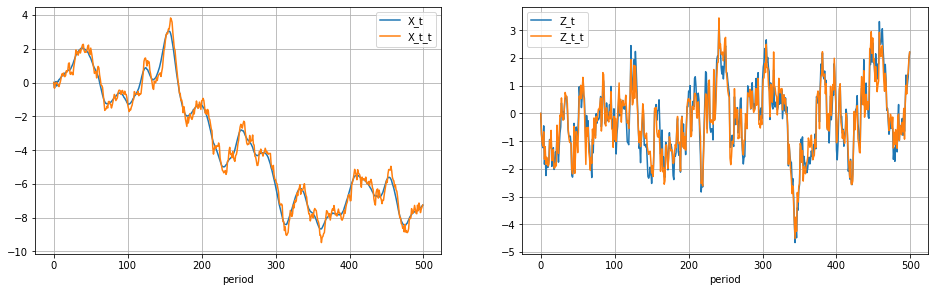

In [36]:
# Plot the smoothed expectations

plt.figure(figsize=(16,10))
plt.subplot(221)
plt.plot(a_t_sm[:,0,:],label='X_t')
plt.plot(a_t_sm[:,3,:],label='X_t_t')
plt.legend()
plt.xlabel('period')
plt.grid()
plt.subplot(222)
plt.plot(a_t_sm[:,2,:],label='Z_t')
plt.plot(a_t_sm[:,5,:],label='Z_t_t')
plt.legend()
plt.xlabel('period')
plt.grid()


plt.show()

# Expectations based on the smoothed estimates
$$lim_{j\rightarrow\infty}E_{t}\left[x_{t+j}\right]=\frac{1}{1-\rho}\left(E_{t}\left[x_{t}\right]-\rho E_{t}\left[x_{t-1}\right]\right)$$

In [37]:
#real time expectations regarding long-run productivity (change in the expectation)
a_t_inf = (a_t_sm[:,3,:] - rho*a_t_sm[:,4,:])/(1-rho) 

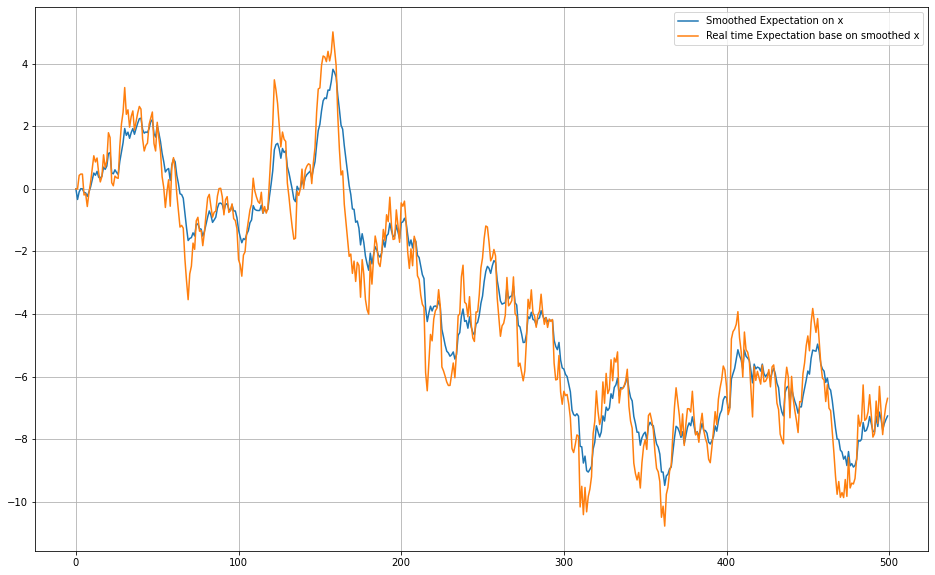

In [38]:
plt.figure(figsize=(16,10))

plt.plot(a_t_sm[:,3,:])
plt.plot(a_t_inf)
plt.legend(('Smoothed Expectation on x','Real time Expectation base on smoothed x'))
plt.grid()
plt.show()

In [39]:
data = pd.read_excel('DataPs3.xlsx')

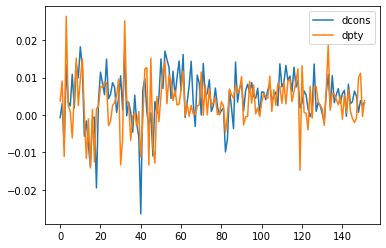

In [40]:
data.plot()

In [41]:
data = data-data.mean()

In [42]:
data = data.cumsum()

In [43]:
data = data[1:]

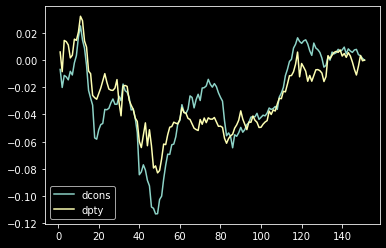

In [55]:
data.plot()

In [44]:
class BHL():
    '''method to compute the BHL model'''    
    def __init__(self, params=None):
                  
        # Initialize parameters
        if params is not None:
            self.update(params)
            
    def update(self, params):
        
        # update the parameter values during estimation  
        self.rho      = 0.89 #params[0]
        self.sig2_a   = params[0]
        self.sig2_nu  = params[1]
        self.sig2_eps = (1- self.rho)**2*params[0]
        self.sig2_eta =  self.rho*params[0]
        
    def K(self):
        # compute the Kalman gain for the consumer filtering problem
        # and the associated filtering matrices for the computation
        # of the consumer expectations
        
        Q = np.array([[self.sig2_eps,0,0],
                      [0,0,0],
                      [0,0,self.sig2_eta]])
        A = np.array([[1+self.rho,-self.rho,0],
                      [1,0,0],
                      [0,0,self.rho]])
        B = np.array([[1,0],
                      [0,0],
                      [0,1]])
        C = np.array([[1,0,1],
                      [1,0,0]])
        D = np.array([[0],
                      [1]])
        R = np.array([[0,0],
                      [0,self.sig2_nu]])
        
        #Σ_t_t1a = np.array([[99999,0,0],
        #                    [0,99999,0],
        #                    [0,0,self.sig2_eta/(1-self.rho)]])
        
        Σ_t_t1a = np.array([[1,0,0],
                           [0,1,0],
                            [0,0,1]])
    
        iter = 100
        for i in range(1,iter):
           
            K      = Σ_t_t1a@C.T@LA.inv(C@(Σ_t_t1a@C.T)+R)
            Σ_t_ta  = Σ_t_t1a - K@C@Σ_t_t1a
            Σ_t_t1a = A@Σ_t_ta@A.T + Q
        
                
        
        IKCA   = (np.identity(3)-K@C)@A
        BIG_Ae = np.vstack([np.hstack([A,np.zeros([3,3])]),
                            np.hstack([K@C@A,IKCA])])     
        BIG_Be = np.vstack([np.hstack([B,np.zeros([3,1])]),
                            np.hstack([K@C@B,K@D])])
        BIG_Ce = np.vstack([[1,0,1,0,0,0],
                            [0,0,0,1/(1-rho),-rho/(1-rho),0]])
 
        Qe     = np.array([[self.sig2_eps,0,0],
                           [0,self.sig2_eta,0],
                           [0,0,self.sig2_nu]])
        
        
        return IKCA, BIG_Ae, BIG_Be, BIG_Ce, Qe
    
    
    def Q(self):
        
        Q = np.array([[self.sig2_eps,0,0],
                      [0,0,0],
                      [0,0,self.sig2_eta]])
        return Q
    
    def A(self):
        
        A = np.array([[1+self.rho,-self.rho,0],
                      [1,0,0],
                      [0,0,self.rho]])
        return A
    
    def B(self):
    
        B =np.array([[1,0],
                     [0,0],
                     [0,1]])
        return B
    
    def C(self):
        C = np.array([[1,0,1],
                      [1,0,0]])
        return C
    
    def D(self):
        D = np.array([[0],
                      [1]])
        return D
    
    def R(self):
        R = np.array([[0,0],
                      [0,self.sig2_nu]])
        return R
    

In [45]:
from scipy.optimize import minimize                      #import package for scientific computing
from datetime import datetime
start_time = datetime.now() 

endog=np.expand_dims(np.array([data.iloc[:,1].T,data.iloc[:,0].T]),axis=2)
# Minimization of -LogLikelihood, constrained
# initial guesses
theta_start = np.array([0.58**2, .81**2])

# Nelder-Mead, BFGS, 
res = minimize(neg_loglike, theta_start,args=(endog),method="Nelder-Mead",options={'disp': True,'maxiter':10000})
end_time = datetime.now()
print('Total Time: {}'.format(end_time - start_time))

/Users/francescofranco/anaconda3/envs/work/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in log


Optimization terminated successfully.
         Current function value: -1084.141374
         Iterations: 96
         Function evaluations: 182
Total Time: 0:01:35.539320


In [46]:
res.x**0.5

array([0.00668626, 0.00851224])

In [47]:
#Let us build our filtered expectations from the estimated parameters

r = 6
n = 2
T            = endog.shape[1]
S_t_t1       = np.zeros([T+1,r,1])
S_t_t        = np.zeros([T,r,1])
U_t          = np.zeros([T,n,1])
X_t_t1       = np.zeros([T,n,1])
Σ_t_t1       = np.zeros([T+1,r,r])
Σ_t_t        = np.zeros([T,r,r])

Σ_t_t1a = np.array([[99999,0,0,0,0,0],
                            [0,99999,0,0,0,0],
                            [0,0,rho*res.x[0]/(1-rho),0,0,0],
                            [0,0,0,99999,0,0],
                            [0,0,0,0,99999,0],
                            [0,0,0,0,0,rho*res.x[0]/(1-rho)]])
Σ_t_t1[0,:,:]= np.identity(r)
#Σ_t_t1[0,:,:]= Σ_t_t1a
MSE_t_t1     = np.zeros([T,n,n])
K_t          = np.zeros([T,r,n])
L_t          = np.zeros([T,r,r])
 
X_t          = endog

for t in range(0,T):
    mod=BHL(res.x)
    #solution of the agent
    IKCA, BIG_Ae, BIG_Be, BIG_Ce, Qe = mod.K()
   
    #Kalman recursion
    
    
    
    X_t_t1[t,:,:]   = BIG_Ce@S_t_t1[t,:,:]
    U_t[t,:,:]      = X_t[:,t,:]- X_t_t1[t,:,:]
    MSE_t_t1[t,:,:] = BIG_Ce@Σ_t_t1[t,:,:]@BIG_Ce.T    
    K_t[t,:,:]      = Σ_t_t1[t,:,:]@BIG_Ce.T@LA.inv(MSE_t_t1[t,:,:])
    L_t[t,:,:]      = BIG_Ae - BIG_Ae@K_t[t,:,:]@BIG_Ce
    S_t_t[t,:,:]    = S_t_t1[t,:,:] + K_t[t,:,:]@(X_t[:,t,:]-X_t_t1[t,:,:])
    Σ_t_t[t,:,:]    = Σ_t_t1[t,:,:] - K_t[t,:,:]@BIG_Ce@Σ_t_t1[t,:,:]
    S_t_t1[t+1,:,:] = BIG_Ae@S_t_t[t,:,:]
    Σ_t_t1[t+1,:,:] = BIG_Ae@Σ_t_t[t,:,:]@BIG_Ae.T + BIG_Be@Qe@BIG_Be.T
                             
                             

In [49]:
#smoothing
J_t             = np.zeros([T,r,r])
#S_t_sm          = np.zeros([T,r,1])
#S_t_sm[T-1,:,:] = S_t_t[T-1,:,:]
r_t           = np.zeros([T,r,1])
a_t_sm          = np.zeros([T,r,1])
eta_t_sm          = np.zeros([T,3,1])
#for t in range(1,T):
    #J_t[t,:,:] = Σ_t_t[t,:,:]@BIG_Ae.T@LA.pinv(Σ_t_t1[t,:,:])
    #L_t[t,:,:]      = BIG_Ae - BIG_Ae@K_t[T-1,:,:]@BIG_Ce
L_t[T-1] = np.eye(6)
for t in range(1,T+1):
   
    #S_t_sm[T-1-t,:,:] =  S_t_t[T-t,:,:] + J_t[T-t,:,:]@(S_t_sm[T-t,:,:] - S_t_t1[T-t,:,:])
    r_t[T-t-1,:,:] = BIG_Ce.T@LA.inv(MSE_t_t1[T-t,:,:])@U_t[T-t,:,:] + L_t[T-t,:,:].T@r_t[T-t,:,:]
    a_t_sm[T-t-1,:,:] = S_t_t1[T-t,:,:] + Σ_t_t1[T-t,:,:]@r_t[T-t-1,:,:]
    eta_t_sm[T-t,:,:] = Qe@BIG_Be.T@r_t[T-t,:,:]

In [50]:
a_t_t_inf = (a_t_sm[:,3,:] - rho*a_t_sm[:,4,:])/(1-rho) 
a_t_inf = (a_t_sm[:,0,:] - rho*a_t_sm[:,1,:])/(1-rho) 

In [51]:
date = np.arange(1970.25,2008,0.25)

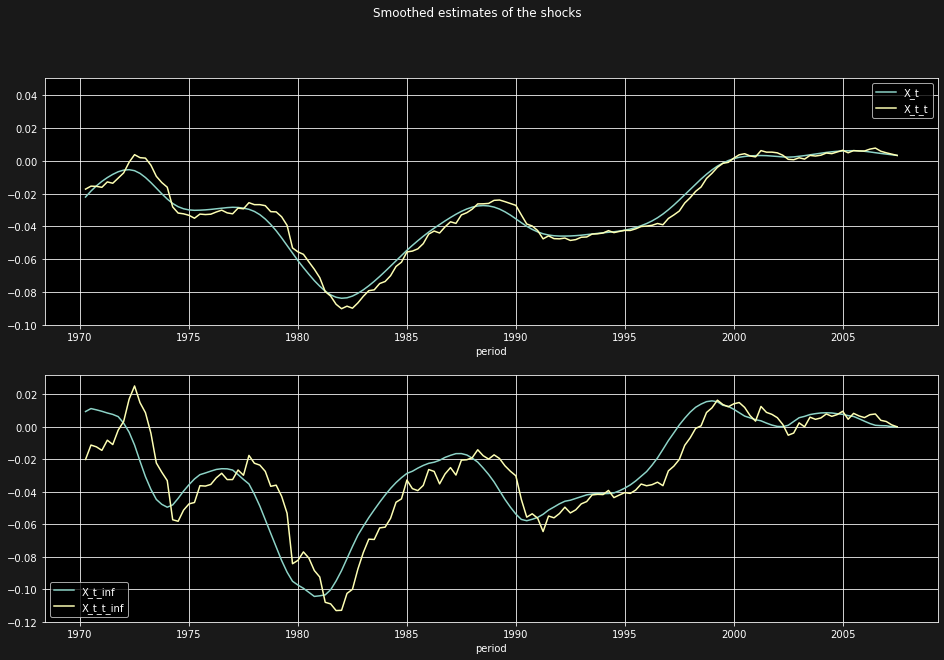

In [52]:
# Plot the smoothed expectations

plt.style.use('dark_background')
fig=plt.figure(figsize=(16,10))
plt.subplot(211)

plt.plot(date[0:-1],a_t_sm[0:-1,0,:],label='X_t')
plt.plot(date[0:-1],a_t_sm[0:-1,3,:],label='X_t_t')

plt.ylim([-0.1, 0.05])
plt.legend()
plt.xlabel('period')
plt.grid()
plt.subplot(212)
plt.plot(date[0:-1],a_t_inf[0:-1],label='X_t_inf')
plt.plot(date[0:-1],a_t_t_inf[0:-1],label='X_t_t_inf')
plt.legend()
plt.xlabel('period')
plt.grid()

plt.suptitle('Smoothed estimates of the shocks')

fig.patch.set_facecolor('#191919')
#plt.savefig('C:\\Users\\ffranco\\Dropbox\\Github\\Prova\\assetsEM\\pasted4.png', facecolor=fig.get_facecolor())
plt.savefig("/Users/francescofranco/Dropbox/Github/Prova/assetsEM/Pasted3.png", facecolor=fig.get_facecolor())
plt.show()


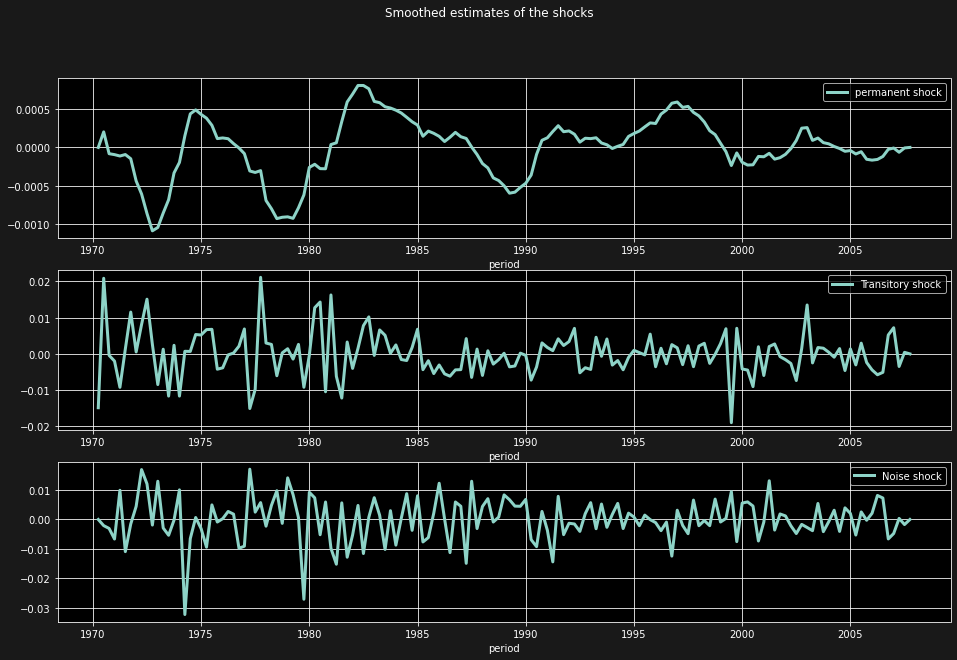

In [53]:
# Graph 4

plt.style.use('dark_background')
fig=plt.figure(figsize=(16,10))
plt.subplot(311)
plt.plot(date,eta_t_sm[:,0,:],label='permanent shock',linewidth=3)
plt.legend()
plt.xlabel('period')
plt.grid()
plt.subplot(312)
plt.plot(date,eta_t_sm[:,1,:],label='Transitory shock',linewidth=3)
plt.legend()
plt.xlabel('period')
plt.grid()
plt.subplot(313)
plt.plot(date,eta_t_sm[:,2,:],label='Noise shock',linewidth=3)
plt.legend()
plt.xlabel('period')
plt.grid()



plt.suptitle('Smoothed estimates of the shocks')

fig.patch.set_facecolor('#191919')
#plt.savefig('C:\\Users\\ffranco\\Dropbox\\Github\\Prova\\assetsEM\\pasted4.png', facecolor=fig.get_facecolor())
plt.savefig("/Users/francescofranco/Dropbox/Github/Prova/assetsEM/Pasted4.png", facecolor=fig.get_facecolor())
plt.show()
